In [96]:
include("fld.jl")
using PyPlot
using CSV

In [81]:
Nr = 2
Nz = 2
Lz = 5
println("Size of domain in Z is $(Lz)")
Lr = 5
dr = Lr/Nr
dz = Lz/Nz
T = ones(Nr*Nz)*0.4
rho = ones(Nr,Nz)
Er = a*(0.7*ones(Nr*Nz)).^4
sigma_func(t,T,Nr,Nz,Lr,Lz) = 100.0 + 0*reshape(T,Nr,Nz)
D_func(t,T,Nr,Nz,Lr,Lz,Er,sigma) = 1.0./(3.0*sigma)*1e-10
Cv_func(t,T,Nr,Nz,Lr,Lz) = 0.01*ones(Nr,Nz)
EOS(t,T,Nr,Nz,Lr,Lz) = 0.01*T
EOS(t,T,i,j,Nr,Nz,Lr,Lz) = 0.01*T
invEOS(t,E,Nr,Nz,Lr,Lz) = E/0.01
single_invEOS(t,E,i,j,Nr,Nz,Lr,Lz) = E/0.01

println(Er,a*T.^4,EOS(0,T,Nr,Nz,Lr,Lz))
function Q_func(t,T,Nr,Nz,Lr,Lz)
    hr = Lr/Nr
    hz = Lz/Nz
    Q = zeros(Nr,Nz)
    Q
end
EOS

Size of domain in Z is 5
[0.00329417, 0.00329417, 0.00329417, 0.00329417][0.000351232, 0.000351232, 0.000351232, 0.000351232][0.004, 0.004, 0.004, 0.004]


EOS (generic function with 2 methods)

In [82]:
tfinal = 0.005
dt = 0.001
steps = convert(Int,round(tfinal/dt))
times, Er_t,T_t, diff_solves, outer_its = gray_GARNET(tfinal,dt,T,Er,D_func,sigma_func,Q_func,Cv_func,EOS,invEOS,single_invEOS,rho,
                              Nr,Nz,Lr,Lz,lower_z = "refl",upper_z="refl",upper_r="refl", LOUD=1, 
                              fname="tmp.jld", max_its = 200, conserve = true)


6
Er_prev = 0.0032941719999999993 Er_eq = 0.0015225057655977362 T_prev = 0.4 T_init = 0.6947213047630777 T_eq = 0.577166623444964
Er_prev = 0.0032941719999999993 Er_eq = 0.0015225057655977362 T_prev = 0.4 T_init = 0.6947213047630777 T_eq = 0.577166623444964
Er_prev = 0.0032941719999999993 Er_eq = 0.0015225057655977362 T_prev = 0.4 T_init = 0.6947213047630777 T_eq = 0.577166623444964
Er_prev = 0.0032941719999999993 Er_eq = 0.0015225057655977362 T_prev = 0.4 T_init = 0.6947213047630777 T_eq = 0.577166623444964
[-0.969953 -0.969953; -0.969953 -0.969953]
[-0.97784 -0.97784; -0.97784 -0.97784]
[-0.980496 -0.980496; -0.980496 -0.980496]
[-0.981405 -0.981405; -0.981405 -0.981405]
[-0.981722 -0.981722; -0.981722 -0.981722]
[-0.981833 -0.981833; -0.981833 -0.981833]
[-0.981872 -0.981872; -0.981872 -0.981872]
[-0.981886 -0.981886; -0.981886 -0.981886]
[-0.981891 -0.981891; -0.981891 -0.981891]
[-0.981892 -0.981892; -0.981892 -0.981892]
[-0.981893 -0.981893; -0.981893 -0.981893]
[-0.981893 -0.981

([0.0, 0.001, 0.002, 0.003, 0.004, 0.005], [0.00329417 0.0031267 … 0.00269028 0.00256539; 0.00329417 0.0031267 … 0.00269028 0.00256539; 0.00329417 0.0031267 … 0.00269028 0.00256539; 0.00329417 0.0031267 … 0.00269028 0.00256539], [0.4 0.416747 … 0.460389 0.472878; 0.4 0.416747 … 0.460389 0.472878; 0.4 0.416747 … 0.460389 0.472878; 0.4 0.416747 … 0.460389 0.472878], [15.0, 15.0, 15.0, 16.0, 16.0, 0.0], [14.0, 14.0, 14.0, 15.0, 15.0, 0.0])

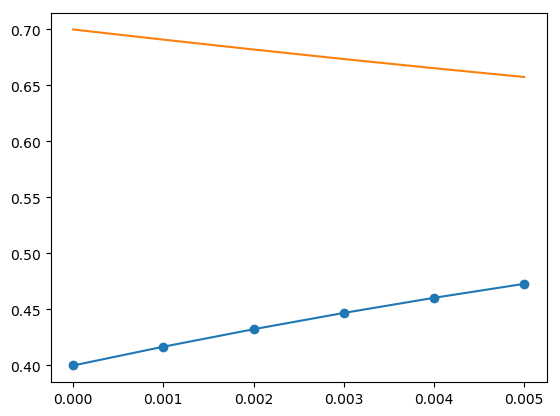

0.007294172
0.007294172


In [76]:
plot(times,T_t[1,:],"o-")
plot(times,(Er_t[1,:]/a).^.25)
println(EOS(0,T_t[1,steps+1],1,1,1,1) + Er_t[1,steps+1])
println(EOS(0,T_t[1,1],1,1,1,1) + Er_t[1,1])

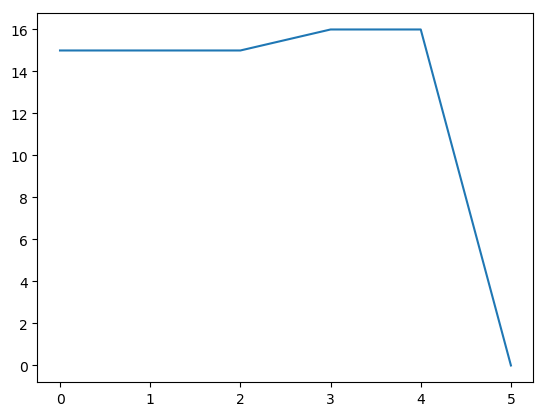

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f98806bef50>

In [71]:
plot(diff_solves)

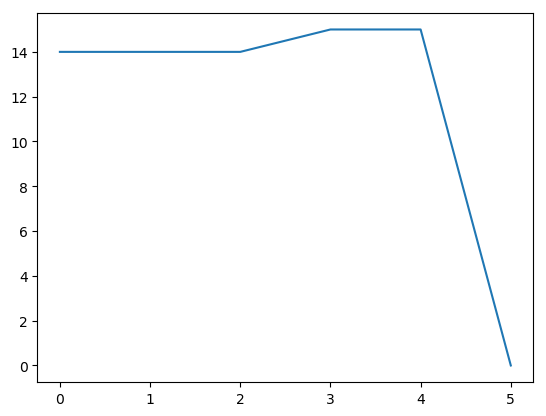

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f9880a83e90>

In [72]:
plot(outer_its)

In [95]:
println(B1(1e-15,1)/(a*c/(4*pi)))

0.9999999997135917
